In [2]:
from manim import *
# config.media_width = "75%"
config.verbosity = "WARNING"
config.background_color = WHITE

color_off = GRAY_A
color_on = BLACK

In [3]:
def set_the_stage(scene: Scene):
    agv = RoundedRectangle(corner_radius=0.5, height=4.0, width=8.0, stroke_color=color_on)
    scene.add(agv)
    scene.add(Text("FRONT", color=color_on, font_size=20).rotate(3*PI/2).shift(3.5*RIGHT))
    # scene.add(Text("BACK", color=color_on, font_size=20).rotate(3*PI/2).shift(-3.5*RIGHT))
    leds_back = []
    leds_front = []
    for i in range(-5, 6, 1):
        led = Dot(point=[-4.2, i * 0.3, 0.], color=color_off, fill_opacity=0.9)
        scene.add(led)
        leds_back.append(led)
        led = Dot(point=[4.2, i * 0.3, 0.], color=color_off, fill_opacity=0.9)
        scene.add(led)
        leds_front.append(led)

    leds_left = []
    leds_right = []
    for i in range(-12, 13, 1):
        led = Dot(point=[i * 0.3, -2.2, 0], color=color_off, fill_opacity=0.9)
        leds_right.append(led)
        scene.add(led)
        led = Dot(point=[i * 0.3, 2.2, 0], color=color_off, fill_opacity=0.9)
        leds_left.append(led)
        scene.add(led)
    leds = {}
    leds['left'] = leds_left
    leds['right'] = leds_right
    leds['front'] = leds_front
    leds['back'] = leds_back

    return leds
    # led = Dot(point=[0, -2.2, 0], color=color_off, fill_opacity=0.9)
    # scene.add(led)

Manim Community v0.18.1

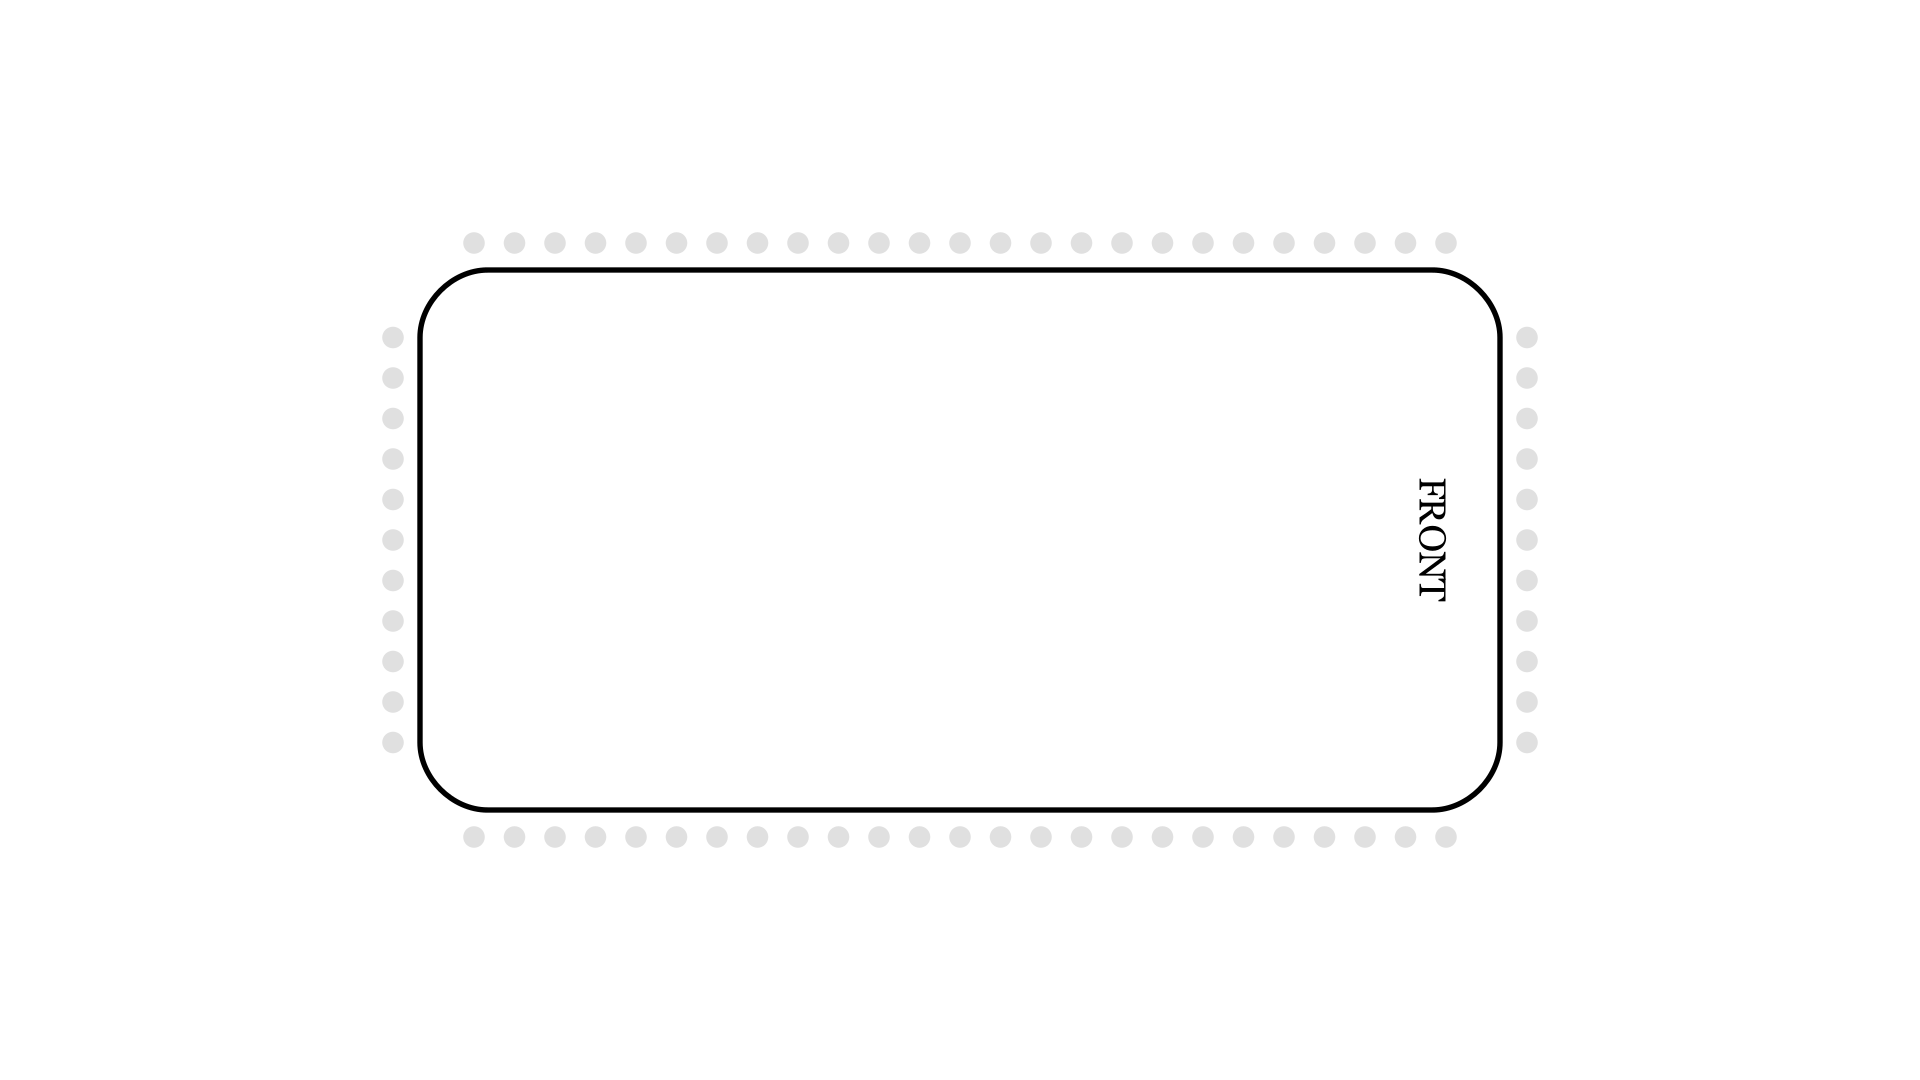

In [4]:
%%manim -qh Trial
class Trial(Scene):
    def construct(self):
        leds = set_the_stage(self)

In [5]:
def get_active_leds(leds, pattern):

    if pattern == 'S1':
        return leds
    active_leds = {}
    if pattern == 'S2':
        for key in ['front', 'back']:
            active_leds[key] = leds[key][:3] + leds[key][-3:]
        for key in ['left', 'right']:
            active_leds[key] = leds[key][:8] + leds[key][-8:]
        return active_leds
    if pattern == 'S3':
        for key in ['front', 'back']:
            active_leds[key] = leds[key][3:8]
        for key in ['left', 'right']:
            active_leds[key] = leds[key][8:17]
        return active_leds
    if pattern == 'S4':
        for key in leds.keys():
            active_leds[key] = leds[key][::2]
        return active_leds

Manim Community v0.18.1

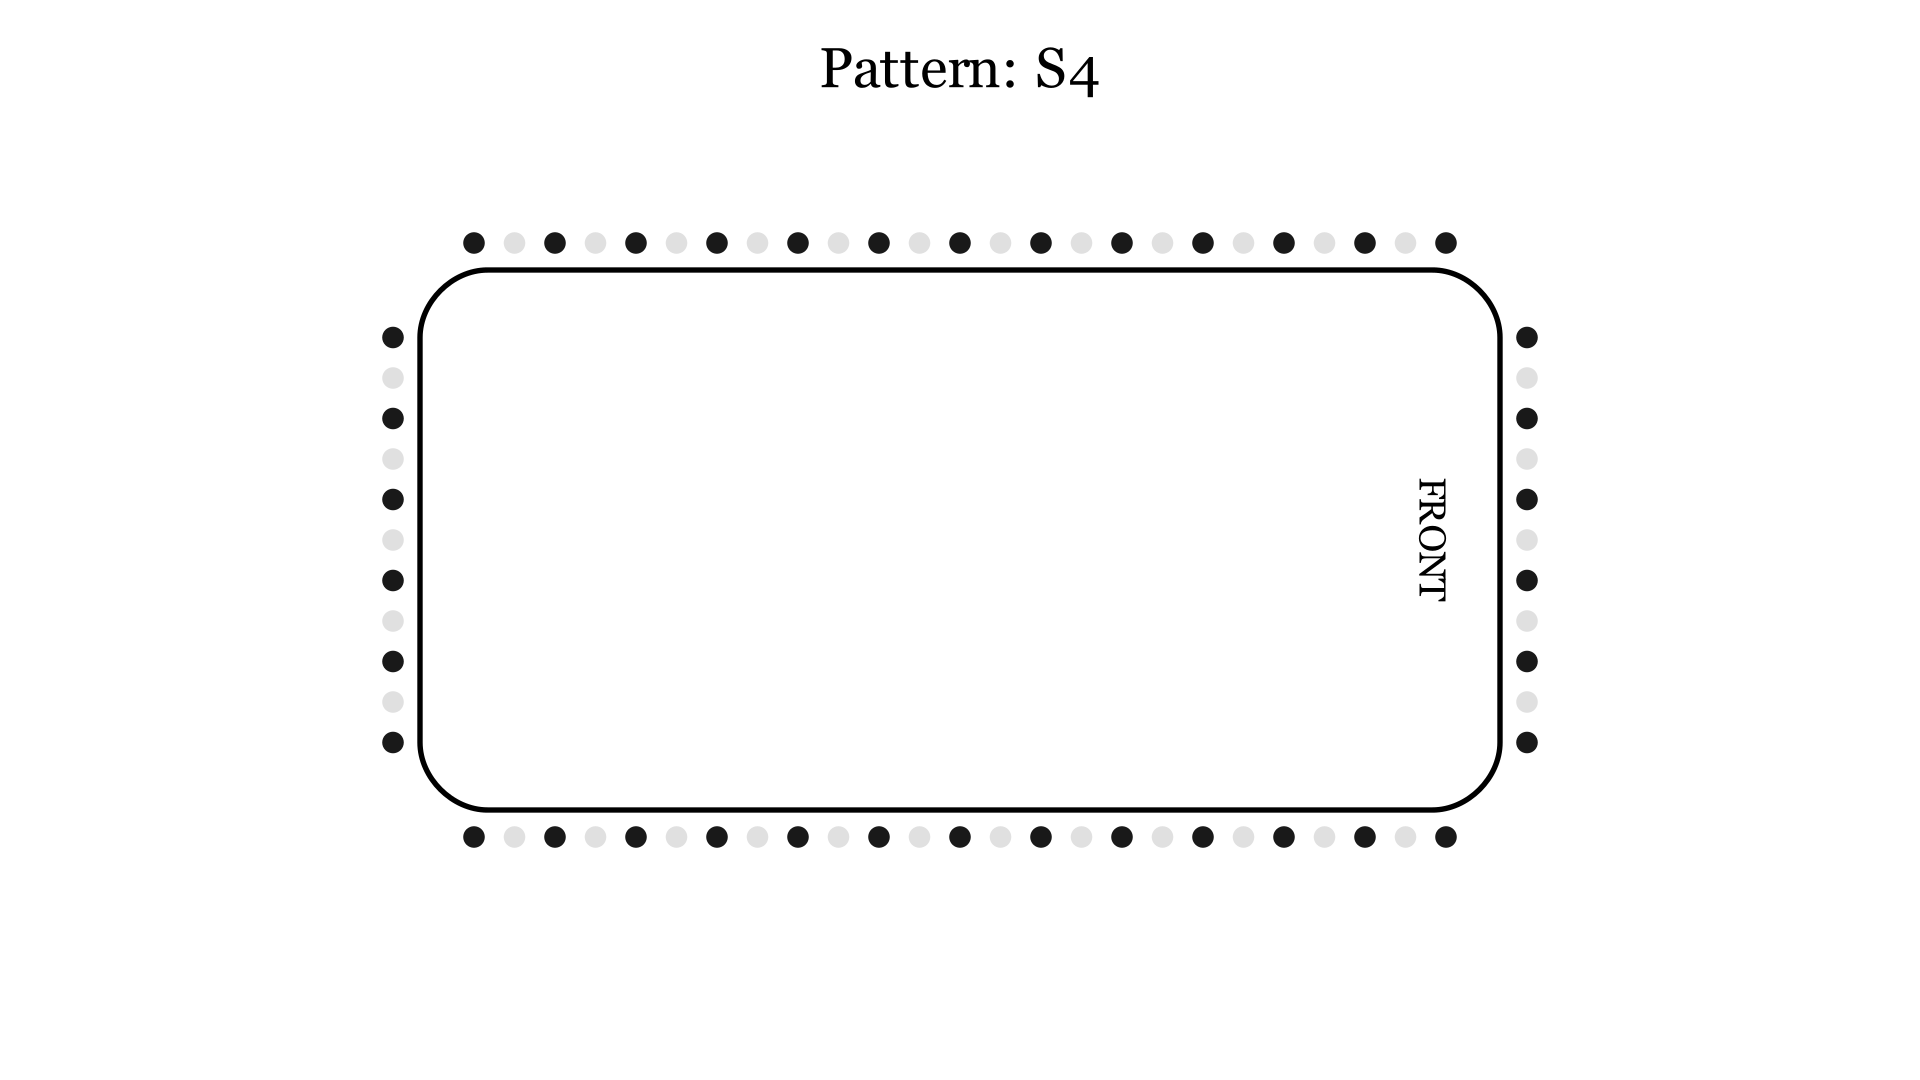

In [6]:
%%manim -qh StaticPattern
class StaticPattern(Scene):
    def construct(self):
        pattern = 'S4'
        leds = set_the_stage(self)
        active_leds = get_active_leds(leds, pattern)
        for led_list in active_leds.values():
            for led in led_list:
                led.set_fill(color=color_on)
        title_text = Text(f"Pattern: {pattern}", color=color_on, font_size=30)
        num_leds_on_side = len(leds['left'])
        title_text.next_to(leds['left'][num_leds_on_side // 2], UP, buff=1)
        self.add(title_text)

In [7]:
%%manim -qh FixedBlinkingPattern
class FixedBlinkingPattern(Scene):
    def construct(self):
        pattern = 'S1'
        leds = set_the_stage(self)
        active_leds = get_active_leds(leds, pattern)
        animations = []
        for led_list in active_leds.values():
            for led in led_list:
                animations.append(led.animate(run_time=0.4).set_fill(color=color_on))
        title_text = Text(f"Pattern: {pattern}", color=color_on, font_size=30)
        num_leds_on_side = len(leds['left'])
        title_text.next_to(leds['left'][num_leds_on_side // 2], UP, buff=1)
        self.add(title_text)
        self.play(*animations)
        animations = []
        for led_list in active_leds.values():
            for led in led_list:
                animations.append(led.animate(run_time=0.4).set_fill(color=color_off))
        # self.wait(0.1)
        self.play(*animations)

Manim Community v0.18.1

In [26]:
%%manim -qh FixedBreathingPattern
class FixedBreathingPattern(Scene):
    def construct(self):
        pattern = 'S1'
        leds = set_the_stage(self)
        active_leds = get_active_leds(leds, pattern)
        animations = []
        for led_list in active_leds.values():
            for led in led_list:
                animations.append(FadeToColor(led, color=color_on))
        title_text = Text(f"Pattern: {pattern}", color=color_on, font_size=30)
        num_leds_on_side = len(leds['left'])
        title_text.next_to(leds['left'][num_leds_on_side // 2], UP, buff=1)
        self.add(title_text)
        self.play(*animations, run_time=1.5)
        self.wait(0.3)
        animations = []
        for led_list in active_leds.values():
            for led in led_list:
                animations.append(FadeToColor(led, color=color_off))
        # self.wait(0.1)
        self.play(*animations, run_time=1.5)
        self.wait(0.3)

Manim Community v0.18.1

In [9]:
%%manim -qh TravelingLight
class TravelingLight(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds_all = []

        leds_all.extend(leds['left'])
        leds_all.extend(leds['front'][::-1])
        leds_all.extend(leds['right'][::-1])
        leds_all.extend(leds['back'])

        num_leds_on = 5
        total_leds = len(leds_all)
        for i in range(num_leds_on):
            leds_all[i].set_fill(color=color_on)
        for i in range(num_leds_on, len(leds_all)):
            self.wait(0.05)
            leds_all[i-num_leds_on].set_fill(color=color_off)
            leds_all[i].set_fill(color=color_on)
        for i in range(num_leds_on):
            self.wait(0.05)
            leds_all[total_leds - num_leds_on + i].set_fill(color=color_off)
            leds_all[i].set_fill(color=color_on)
        self.wait(0.05)

Manim Community v0.18.1

In [10]:
%%manim -qh TravelingLightAllSides
class TravelingLightAllSides(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds_all = []
        num_left = len(leds['left'])
        num_front = len(leds['front'])

        leds_all.extend(leds['left'])
        leds_all.extend(leds['front'][::-1])
        leds_all.extend(leds['right'][::-1])
        leds_all.extend(leds['back'])

        # The below values are selected so that there are 8 strips of active leds that move around the AGV
        num_leds_on = 4             # number of adjacent leds on
        gap_between = 5             # gap between lit leds
        pattern_length = num_leds_on + gap_between
        i = 0
        while i < len(leds_all) - num_leds_on:
            for j in range(i, i+num_leds_on):
                leds_all[j].set_fill(color=color_on)
            i = i + pattern_length

        for i in range(len(leds_all)):
            self.wait(0.05)
            for j in range(8):
                leds_all[(i + pattern_length * j) % len(leds_all)].set_fill(color=color_off)
                leds_all[(i + num_leds_on + pattern_length * j) % len(leds_all)].set_fill(color=color_on)
        self.wait(0.05)

Manim Community v0.18.1

In [11]:
%%manim -qh AlternateBlinking
class AlternateBlinking(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds_all = []
        for key in ['left', 'front', 'right', 'back']:
            leds_all.extend(leds[key])

        alternate_leds_1 = leds_all[::2]
        alternate_leds_2 = leds_all[1::2]

        for led in alternate_leds_1:
            led.set_fill(color=color_on)
        animations = []
        for led1, led2 in zip(alternate_leds_1, alternate_leds_2):
            animations.append(led1.animate(run_time=0.8).set_fill(color=color_off))
            animations.append(led2.animate(run_time=0.8).set_fill(color=color_on))
        self.play(*animations)

        for led1, led2 in zip(alternate_leds_1, alternate_leds_2):
            animations.append(led1.animate(run_time=0.8).set_fill(color=color_on))
            animations.append(led2.animate(run_time=0.8).set_fill(color=color_off))
        self.play(*animations)

Manim Community v0.18.1

In [12]:
%%manim -qh AlternatePatternBlinking
class AlternatePatternBlinking(Scene):
    def construct(self):
        leds = set_the_stage(self)
        pattern_S2 = 'S2'
        active_leds_S2 = get_active_leds(leds, pattern_S2)

        for _leds in active_leds_S2.values():
            for led in _leds:
                led.set_fill(color=color_on)

        pattern_S3 = 'S3'
        active_leds_S3 = get_active_leds(leds, pattern_S3)

        animations = []
        for _leds in active_leds_S2.values():
            for led in _leds:
                animations.append(led.animate(run_time=0.8).set_fill(color=color_off))
        for _leds in active_leds_S3.values():
            for led in _leds:
                animations.append(led.animate(run_time=0.8).set_fill(color=color_on))
        self.play(*animations)

        animations = []
        for _leds in active_leds_S2.values():
            for led in _leds:
                animations.append(led.animate(run_time=0.8).set_fill(color=color_on))
        for _leds in active_leds_S3.values():
            for led in _leds:
                animations.append(led.animate(run_time=0.8).set_fill(color=color_off))
        self.play(*animations)
       

Manim Community v0.18.1

In [13]:
%%manim -qh ForwardMovingLights
class ForwardMovingLights(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds_left_of_center = []
        leds_right_of_center = []

        num_front = len(leds['front'])
        middle_idx = num_front // 2
        leds_left_of_center.extend(leds['back'][middle_idx:])
        leds_left_of_center.extend(leds['left'])
        leds_left_of_center.extend(leds['front'][middle_idx:][::-1])  # reversed

        leds_right_of_center.extend(leds['back'][:middle_idx+1][::-1])  # reversed
        leds_right_of_center.extend(leds['right'])
        leds_right_of_center.extend(leds['front'][:middle_idx+1])

        num_active_leds = 5

        for i, (led1, led2) in enumerate(zip(leds_left_of_center, leds_right_of_center)):
            self.wait(0.075)
            led1.set_fill(color=color_on)
            led2.set_fill(color=color_on)

            if i > num_active_leds:
                leds_left_of_center[0].set_fill(color=color_off)
                leds_left_of_center[i-num_active_leds].set_fill(color=color_off)
                leds_right_of_center[i-num_active_leds].set_fill(color=color_off)

        last_on_idx = len(leds_left_of_center) - num_active_leds - 1
        for i in range(last_on_idx, len(leds_left_of_center)):
            self.wait(0.075)
            leds_left_of_center[i].set_fill(color=color_off)
            leds_right_of_center[i].set_fill(color=color_off)
        self.wait(0.075)
        leds_left_of_center[-1].set_fill(color=color_off)
        # testing
        # animations = []
        # for led in leds_left_of_center:
        #     animations.append(led.animate(run_time=1.0).set_fill(color=color_on))
        # self.play(*animations)

Manim Community v0.18.1

In [15]:
%%manim -qh BackwardMovingLights
class BackwardMovingLights(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds_left_of_center = []
        leds_right_of_center = []

        num_front = len(leds['front'])
        middle_idx = num_front // 2
        leds_left_of_center.extend(leds['back'][middle_idx:])
        leds_left_of_center.extend(leds['left'])
        leds_left_of_center.extend(leds['front'][middle_idx:][::-1])  # reversed
        
        leds_left_of_center = leds_left_of_center[::-1] # reverse the whole thing

        leds_right_of_center.extend(leds['back'][:middle_idx+1][::-1])  # reversed
        leds_right_of_center.extend(leds['right'])
        leds_right_of_center.extend(leds['front'][:middle_idx+1])

        leds_right_of_center = leds_right_of_center[::-1] # reverse the whole thing

        num_active_leds = 5

        for i, (led1, led2) in enumerate(zip(leds_left_of_center, leds_right_of_center)):
            self.wait(0.075)
            led1.set_fill(color=color_on)
            led2.set_fill(color=color_on)

            if i > num_active_leds:
                leds_left_of_center[0].set_fill(color=color_off)
                leds_left_of_center[i-num_active_leds].set_fill(color=color_off)
                leds_right_of_center[i-num_active_leds].set_fill(color=color_off)

        last_on_idx = len(leds_left_of_center) - num_active_leds - 1
        for i in range(last_on_idx, len(leds_left_of_center)):
            self.wait(0.075)
            leds_left_of_center[i].set_fill(color=color_off)
            leds_right_of_center[i].set_fill(color=color_off)
        self.wait(0.075)
        leds_left_of_center[-1].set_fill(color=color_off)
        # testing
        # animations = []
        # for led in leds_left_of_center:
        #     animations.append(led.animate(run_time=1.0).set_fill(color=color_on))
        # self.play(*animations)

Manim Community v0.18.1

In [16]:
%%manim -qh ForwardProgressBar
class ForwardProgressBar(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds_left_of_center = []
        leds_right_of_center = []

        num_front = len(leds['front'])
        middle_idx = num_front // 2
        leds_left_of_center.extend(leds['back'][middle_idx:])
        leds_left_of_center.extend(leds['left'])
        leds_left_of_center.extend(leds['front'][middle_idx:][::-1])  # reversed

        leds_right_of_center.extend(leds['back'][:middle_idx+1][::-1])  # reversed
        leds_right_of_center.extend(leds['right'])
        leds_right_of_center.extend(leds['front'][:middle_idx+1])
        
        for i, (led1, led2) in enumerate(zip(leds_left_of_center, leds_right_of_center)):
            self.wait(0.075)
            led1.set_fill(color=color_on)
            led2.set_fill(color=color_on)
        self.wait(0.075)

Manim Community v0.18.1

In [17]:
%%manim -qh BackwardProgressBar
class BackwardProgressBar(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds_left_of_center = []
        leds_right_of_center = []

        num_front = len(leds['front'])
        middle_idx = num_front // 2
        leds_left_of_center.extend(leds['back'][middle_idx:])
        leds_left_of_center.extend(leds['left'])
        leds_left_of_center.extend(leds['front'][middle_idx:][::-1])  # reversed

        leds_left_of_center = leds_left_of_center[::-1] # reverse the whole thing

        leds_right_of_center.extend(leds['back'][:middle_idx+1][::-1])  # reversed
        leds_right_of_center.extend(leds['right'])
        leds_right_of_center.extend(leds['front'][:middle_idx+1])

        leds_right_of_center = leds_right_of_center[::-1] # reverse the whole thing
        
        for i, (led1, led2) in enumerate(zip(leds_left_of_center, leds_right_of_center)):
            self.wait(0.075)
            led1.set_fill(color=color_on)
            led2.set_fill(color=color_on)
        self.wait(0.075)

Manim Community v0.18.1

In [18]:
%%manim -qh CornerProgressBarClockwise
class CornerProgressBarClockwise(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds['front'] = leds['front'][::-1]
        leds['right'] = leds['right'][::-1]
        front_back_indices = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11]
        side_indices = [0, 3, 5, 8, 10, 13, 15, 18, 20, 23, 25]
        for i, (idx1, idx2) in enumerate(zip(front_back_indices, side_indices)):
            self.wait(0.2)
            if i == 0:
                continue
            for j in range(front_back_indices[i-1], idx1):
                leds['front'][j].set_fill(color=color_on)
                leds['back'][j].set_fill(color=color_on)
            for j in range(side_indices[i-1], idx2):
                leds['left'][j].set_fill(color=color_on)
                leds['right'][j].set_fill(color=color_on)
        self.wait(0.2)


Manim Community v0.18.1

In [19]:
%%manim -qh CornerProgressBarAnticlockwise
class CornerProgressBarAnticlockwise(Scene):
    def construct(self):
        leds = set_the_stage(self)
        leds['back'] = leds['back'][::-1]
        leds['left'] = leds['left'][::-1]
        front_back_indices = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11]
        side_indices = [0, 3, 5, 8, 10, 13, 15, 18, 20, 23, 25]
        for i, (idx1, idx2) in enumerate(zip(front_back_indices, side_indices)):
            self.wait(0.2)
            if i == 0:
                continue
            for j in range(front_back_indices[i-1], idx1):
                leds['front'][j].set_fill(color=color_on)
                leds['back'][j].set_fill(color=color_on)
            for j in range(side_indices[i-1], idx2):
                leds['left'][j].set_fill(color=color_on)
                leds['right'][j].set_fill(color=color_on)
        self.wait(0.2)

Manim Community v0.18.1

In [22]:
%%manim -qh CenterStartProgressBarIndependent
class CenterStartProgressBarIndependent(Scene):
    def construct(self):
        leds = set_the_stage(self)
        front_back_num_active_leds = [2*i + 1 for i in range(6)]  #[1, 3, 5, 7, 9, 11]
        side_num_active_leds = [4*i+5 for i in range(6)]       #[5, 9, 13, 17, 21, 25]

        center_front_back = len(leds['front']) // 2
        center_sides = len(leds['left']) // 2

        for num1, num2 in zip(front_back_num_active_leds, side_num_active_leds):
            self.wait(0.3)
            for i in range(center_front_back-num1//2, center_front_back+num1//2+1):
                leds['front'][i].set_fill(color=BLACK)
                leds['back'][i].set_fill(color=BLACK)
            for i in range(center_sides-num2//2, center_sides+num2//2+1):
                leds['left'][i].set_fill(color=BLACK)
                leds['right'][i].set_fill(color=BLACK)

        self.wait(0.3)

Manim Community v0.18.1

In [23]:
%%manim -qh DualCornerStartProgressBar
class DualCornerStartProgressBar(Scene):
    def construct(self):
        leds = set_the_stage(self)
        front_back_num_active_leds = [2*i + 2 for i in range(5)]  #[2, 4, 6, 8, 10]
        side_num_active_leds = [4*i+6 for i in range(5)]       #[6, 10, 14, 18, 22]

        for num1, num2 in zip(front_back_num_active_leds, side_num_active_leds):
            self.wait(0.3)
            for i in range(num1//2):
                leds['front'][i].set_fill(color=BLACK)
                leds['back'][i].set_fill(color=BLACK)
                leds['front'][-i-1].set_fill(color=BLACK)
                leds['back'][-i-1].set_fill(color=BLACK)

            for i in range(num2//2):
                leds['left'][i].set_fill(color=BLACK)
                leds['right'][i].set_fill(color=BLACK)
                leds['left'][-i-1].set_fill(color=BLACK)
                leds['right'][-i-1].set_fill(color=BLACK)
        
        self.wait(0.3)

Manim Community v0.18.1